## Testing matminer volume predictor with 62 structures

### Import libraries and set the path which contains the structures in .cif

In [39]:
import os
import pandas as pd
from pymatgen import Structure
from matminer.learners.volume_predictor import VolumePredictor
from pandas.tools.plotting import scatter_matrix
import matplotlib.pyplot as plt

INITIAL_STRUCTURES_PATH = 'matminerStructures/initial/'
RELAXED_STRUCTURES_PATH = 'matminerStructures/relaxed/'

### Import each Structure into a list of dicts
### [{'reduced_formula', 'initial_vol', 'predicted_vol'}]

In [40]:
initial_volumes = []
for f in os.listdir(INITIAL_STRUCTURES_PATH):
    if f.endswith(".cif"):
        s = Structure.from_file(INITIAL_STRUCTURES_PATH+f)
        pred_vol = VolumePredictor().predict(s)
        initial_volumes.append({'reduced_formula':s.composition.reduced_formula, 'initial_volume':s.volume, 'predicted_volume':pred_vol})
        # print s.composition.reduced_formula, "Initial vol: {}".format(s.volume), "Predicted vol: {}".format(pred_vol)

In [47]:
relaxed_volumes = []
for f in os.listdir(RELAXED_STRUCTURES_PATH):
    if f.endswith(".cif"):
        s = Structure.from_file(RELAXED_STRUCTURES_PATH+f)
        pred_vol = VolumePredictor().predict(s)
        relaxed_volumes.append({'reduced_formula':s.composition.reduced_formula, 'relaxed_volume':s.volume, 'predicted_volume':pred_vol})
        # print s.composition.reduced_formula, "Initial vol: {}".format(s.volume), "Predicted vol: {}".format(pred_vol)

In [49]:
i_v = pd.DataFrame(initial_volumes, columns=['reduced_formula', 'initial_volume', 'predicted_volume'])
r_v = pd.DataFrame(relaxed_volumes, columns=['reduced_formula', 'relaxed_volume', 'predicted_volume'])

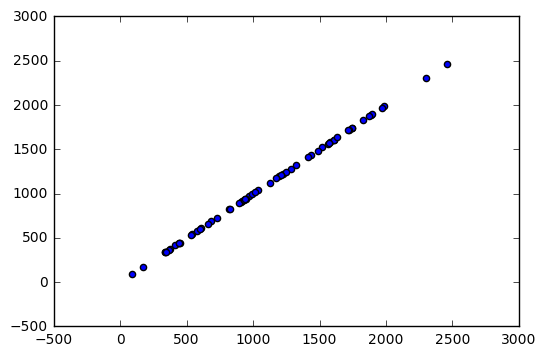

In [62]:
plt.scatter(i_v['initial_volume'], i_v['predicted_volume'])

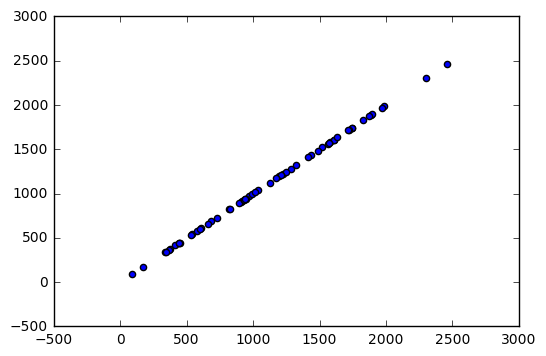

In [63]:
plt.scatter(r_v['relaxed_volume'], r_v['predicted_volume'])